In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
%cd drive/My Drive

/content/drive/My Drive


In [0]:
!unzip cell_images.zip

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
import keras.backend as K

import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
train_dir = 'cell_images/train'
validation_dir = 'cell_images/test'
num_classes = 2
batch_size = 64
epochs = 200
nb_train_samples = 22048
nb_val_samples = 5510
IMG_DIMS = (96 ,96 , 3)

In [0]:
if K.image_data_format == 'channel_first':
  input_shape = (3, IMG_DIMS[0], IMG_DIMS[0])

else:
  input_shape = IMG_DIMS

In [0]:
# Use VGGNet like architecture, which is more compact than the original
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',padding='same',
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),activation='relu', padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(64,(3,3),activation='relu', padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(128,(3,3),activation='relu', padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(128,(3,3),activation='relu', padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='softmax'))

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 96, 96, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 96, 96, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        36928     
__________

In [26]:
# Data augmentation for training set
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# Rescale images in val set
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_DIMS[0], IMG_DIMS[1]),
    batch_size=batch_size,
    class_mode='categorical')

Found 22048 images belonging to 2 classes.


In [27]:
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(IMG_DIMS[0], IMG_DIMS[1]),
    batch_size=batch_size,
    class_mode='categorical')

Found 5510 images belonging to 2 classes.


In [33]:
from keras.callbacks import EarlyStopping

# Use ES to avoid overfitting
early_stopping = EarlyStopping(patience=5)


history=model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples//batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_val_samples//batch_size,
    callbacks=[early_stopping])

model.save('model.h5')

Epoch 1/200
344/344 [==============================] - 5566s 16s/step - loss: 0.6955 - acc: 0.7227 - val_loss: 0.2629 - val_acc: 0.9231
Epoch 2/200
344/344 [==============================] - 117s 341ms/step - loss: 0.2151 - acc: 0.9291 - val_loss: 0.2490 - val_acc: 0.9139
Epoch 3/200
344/344 [==============================] - 116s 338ms/step - loss: 0.1713 - acc: 0.9453 - val_loss: 0.1303 - val_acc: 0.9559
Epoch 4/200
344/344 [==============================] - 116s 338ms/step - loss: 0.1566 - acc: 0.9489 - val_loss: 0.1899 - val_acc: 0.9282
Epoch 5/200
344/344 [==============================] - 117s 341ms/step - loss: 0.1538 - acc: 0.9505 - val_loss: 0.1350 - val_acc: 0.9567
Epoch 6/200
344/344 [==============================] - 115s 333ms/step - loss: 0.1491 - acc: 0.9501 - val_loss: 0.1286 - val_acc: 0.9604
Epoch 7/200
344/344 [==============================] - 115s 334ms/step - loss: 0.1453 - acc: 0.9525 - val_loss: 0.1128 - val_acc: 0.9620
Epoch 8/200
344/344 [=====================

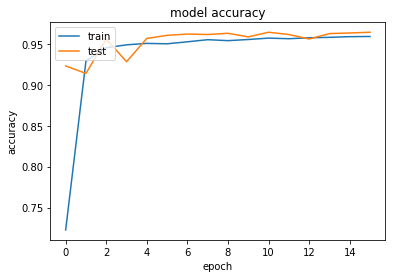

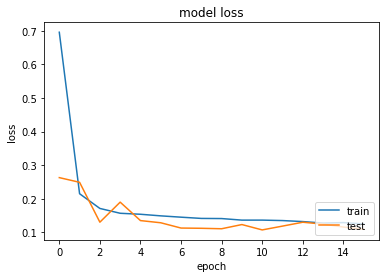

In [34]:
# Summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()